In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CRISP-DM
(Cross-Industry Standard of for Data Mining)
* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

**Business Understanding**

First we need to understand the business of our analysis. That's the easy part. Computers help us think, and these are the guys helping the computer think. Developers are those people in the office with the sun shades closed the whole day which (since the movie Swordfish) have proven to be not that geeky after all. Yes, thats me.

In [2]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 150)

In [3]:
schema2018 = pd.read_csv('data/2018/survey_results_schema.csv')

In [4]:
schema2018

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [5]:
data2018 = pd.read_csv('data/2018/survey_results_public.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Interesting columns
[c for c in data2018.iloc[:, [1, 2, 9, 10, 11, 12, 13, 14, 15, 53, 54, 56,62,63,64,65,66,67,68,69,70,71,72,73,74,93,94,95,96,97,98,99,100,114,
                 115,116,117,118,119,121,122,123,124,125,127,128]].columns]

['Hobby',
 'OpenSource',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'SalaryType',
 'ConvertedSalary',
 'CommunicationTools',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'EthicsChoice',
 'EthicsReport',
 'EthicsResponsible',
 'EthicalImplications',
 'WakeTime',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'ErgonomicDevices',
 'Exercise',
 'SexualOrientation',
 'EducationParents',
 'RaceEthnicity',
 'Age',
 'Dependents',
 'SurveyTooLong',
 'SurveyEasy']

In [7]:
data2018.filter(like='Lang', axis=1).head()

,LanguageWorkedWith,LanguageDesireNextYear
0,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,JavaScript;Python;Bash/Shell,Go;Python
2,NaN,NaN
3,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell


In [8]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [9]:
# First we get all the different languages
delimiter = ';'
all_languages = data2018.LanguageWorkedWith.apply(lambda c: str(c).split(delimiter))

In [10]:
# Make a flat list out of the list of lists
all_languages = [language for languagelist in all_languages for language in languagelist]

In [11]:
# No cleanup the list from nan values and duplicates
all_languages = list(filter(lambda l: l != 'nan', all_languages))
all_languages = set(all_languages)

In [12]:
all_languages

{'Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6'}

In [13]:
# Now we want to make columns out of the languages for better processing
import re
#result = re.match("Bash", data2018.loc[1,:].LanguageWorkedWith)
result = re.search(r'\bBash\b', 'FooBash;Bash;Bashi')
result

<re.Match object; span=(8, 12), match='Bash'>

In [14]:
for language in all_languages:
    data2018[language] = data2018['LanguageWorkedWith'].map(lambda c: language in str(c).split(delimiter))

In [15]:
data2018.loc[:, ['LanguageWorkedWith','C#','CSS']].head()

,LanguageWorkedWith,C#,CSS
0,JavaScript;Python;HTML;CSS,False,True
1,JavaScript;Python;Bash/Shell,False,False
2,NaN,False,False
3,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,True,True
4,C;C++;Java;Matlab;R;SQL;Bash/Shell,False,False


#### C# vs Python

In [16]:
data2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [17]:
def csharp_or_python(col):
    if col['C#'] and col['Python']:
        return 'Both'
    elif col['C#']:
        return 'C#'
    elif col['Python']:
        return 'Python'
    return 'None'

In [18]:
data2018['C# vs Python'] = data2018.apply(lambda col: csharp_or_python(col), axis=1)

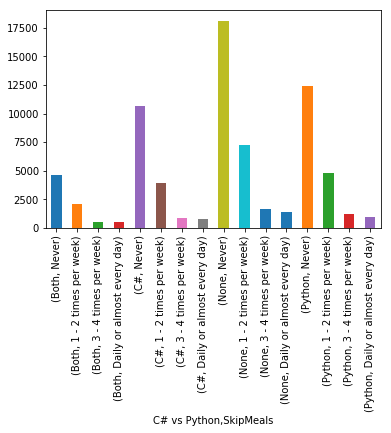

In [19]:
data2018.groupby('C# vs Python')['SkipMeals'].value_counts().plot(kind='bar')

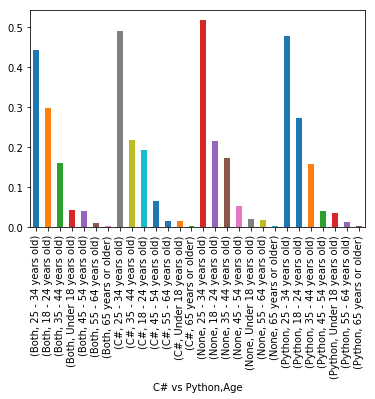

In [20]:
data2018.groupby('C# vs Python')['Age'].value_counts(normalize=True).plot(kind='bar')

Text(0.5,1,'Python & C#')

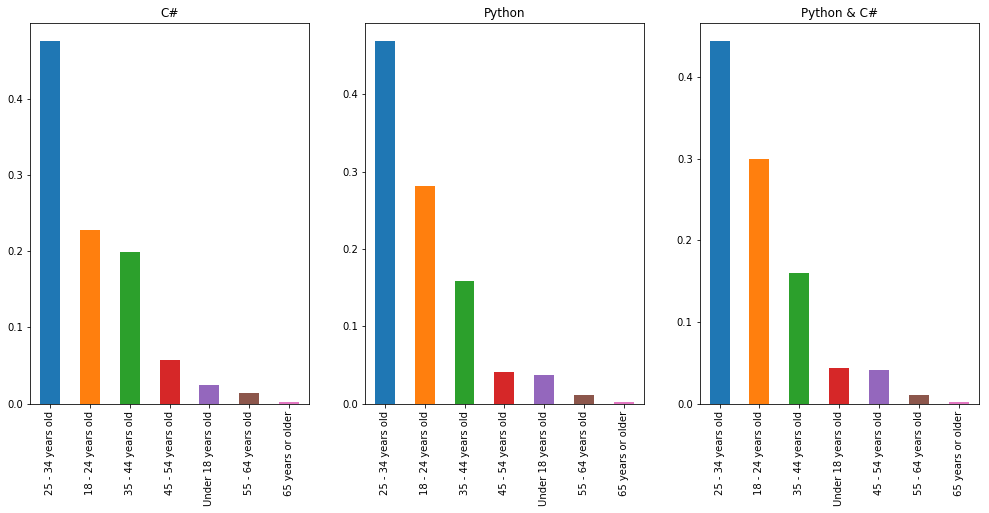

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,7))
data2018[data2018['C#'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Age.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')

In [22]:
# More young people are coding python and more 35 to 44 year old are coding c#. What about people which code both

Text(0.5,1,'Python & C#')

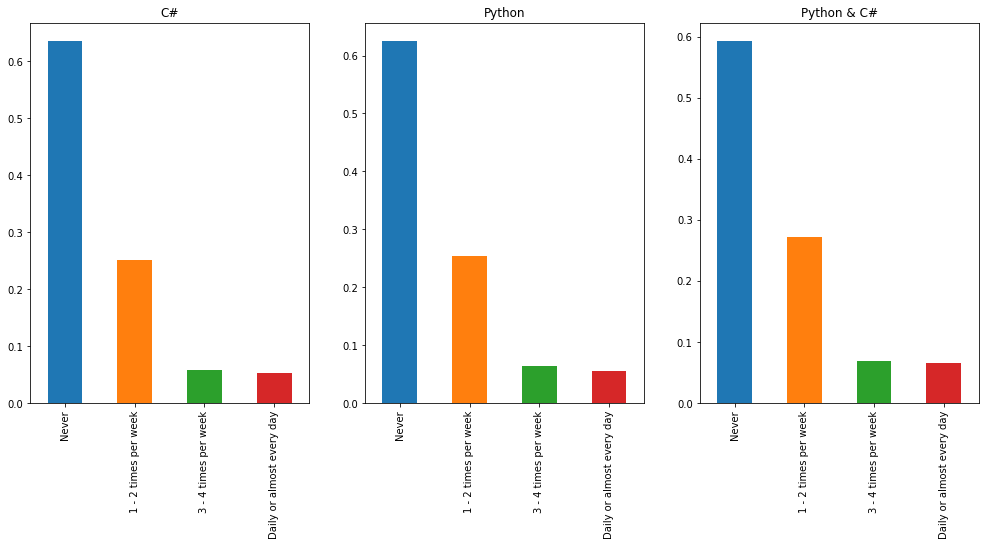

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,7))
data2018[data2018['C#'] == True].SkipMeals.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].SkipMeals.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].SkipMeals.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')

Text(0.5,1,'Python & C#')

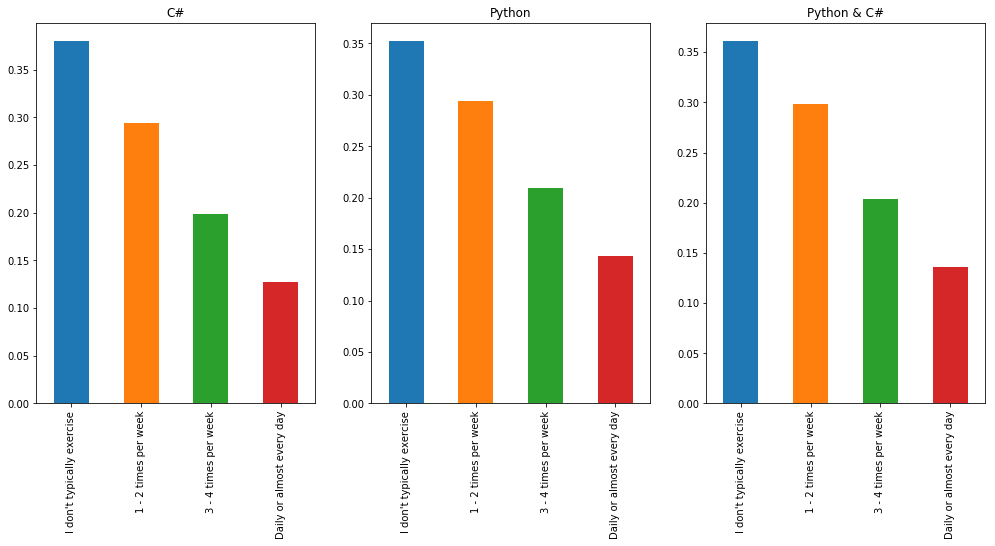

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,7))
data2018[data2018['C#'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')

In [25]:
data2018.Exercise.value_counts(normalize=True)

I don't typically exercise    0.374369
1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
Name: Exercise, dtype: float64

In [26]:
data2018.groupby('C# vs Python')['Exercise'].value_counts(normalize=True)

C# vs Python  Exercise                  
Both          I don't typically exercise    0.361083
              1 - 2 times per week          0.298774
              3 - 4 times per week          0.203779
              Daily or almost every day     0.136364
C#            I don't typically exercise    0.389060
              1 - 2 times per week          0.291703
              3 - 4 times per week          0.196814
              Daily or almost every day     0.122423
None          I don't typically exercise    0.387179
              1 - 2 times per week          0.285789
              3 - 4 times per week          0.188706
              Daily or almost every day     0.138326
Python        I don't typically exercise    0.348757
              1 - 2 times per week          0.292288
              3 - 4 times per week          0.212349
              Daily or almost every day     0.146605
Name: Exercise, dtype: float64

In [27]:
len(all_languages)

38

In [ ]:
fig, axes = plt.subplots(8,5, figsize=(14, 20), sharey=True, sharex=True)
for i, lang in zip(range(38), all_languages):
    data2018[data2018[lang] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=axes[int(i/5), i%5])
    axes[int(i/5), i%5].set_title(lang)

In [ ]:
# Chi-Squared Test of Independence
pd.crosstab(data2018['C# vs Python'], data2018.Exercise, normalize=True)

Try it with the functional programmers!

### First we only compare the distributions

In [ ]:
# Calculate the chi square ourselves with the chi square formular

$$ \chi^2 = \sum_{1}^{z}\frac{(o_z-e_z)^2}{e^z} $$

In [30]:
import numpy as np

In [31]:
population_ratio = data2018.Exercise.value_counts(dropna=True, sort=True, normalize=True)
population_ratio.sort_index()

1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
I don't typically exercise    0.374369
Name: Exercise, dtype: float64

In [32]:
python_programmers = data2018[data2018['Python'] == True]
expected_count = population_ratio * len(python_programmers)
expected_count.sort_index()

1 - 2 times per week           8812.816719
3 - 4 times per week           6028.182199
Daily or almost every day      4152.532548
I don't typically exercise    11365.468533
Name: Exercise, dtype: float64

In [33]:
actual_count = python_programmers.Exercise.value_counts(dropna=True, sort=True)
actual_count.sort_index()

1 - 2 times per week          8044
3 - 4 times per week          5740
Daily or almost every day     3929
I don't typically exercise    9634
Name: Exercise, dtype: int64

In [34]:
(((actual_count.sort_index()-expected_count.sort_index()) ** 2)/expected_count.sort_index()).sum()

356.6600362751675

In [35]:
# Calculating the chi square statistic
chi_squared_stat = (((actual_count.sort_index()-expected_count.sort_index()) ** 2)/expected_count.sort_index()).sum()

In [36]:
print(chi_squared_stat)

356.6600362751675


In [38]:
# First we want to find the critical value for 95% confidence

import scipy.stats as stats

# Degree of freedom is 5-1 =
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(crit)

7.814727903251179


In [39]:
# And now we calcualte the t-value
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  df=3)
p_value

0.0

In [41]:
# Now we calculate all this with scipy
stats.chisquare(f_obs= actual_count,   
                f_exp= expected_count)   

Power_divergenceResult(statistic=356.66003627516744, pvalue=5.389358103510067e-77)

In [44]:
# So there is a dependence between the two variables exercise and python or not
population_ratio = data2018.AIFuture.value_counts(dropna=True, normalize=True)
population_ratio

I'm excited about the possibilities more than worried about the dangers.        0.728158
I'm worried about the dangers more than I'm excited about the possibilities.    0.190297
I don't care about it, or I haven't thought about it.                           0.081545
Name: AIFuture, dtype: float64

In [45]:
python_ratio = python_programmers.AIFuture.value_counts(dropna=True, normalize=True)
python_ratio

I'm excited about the possibilities more than worried about the dangers.        0.765832
I'm worried about the dangers more than I'm excited about the possibilities.    0.167864
I don't care about it, or I haven't thought about it.                           0.066304
Name: AIFuture, dtype: float64

In [49]:
# Now we calculate all this with scipy
stats.chisquare(f_obs= python_programmers.AIFuture.value_counts(dropna=True),   
                f_exp= population_ratio * len(python_programmers))  

Power_divergenceResult(statistic=442.55735100425204, pvalue=7.941312138124615e-97)

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

In [50]:
# Andere interessante Fragen
# Zufriedenheit bei funktionalen und nicht-funktionalen Sprachen
# Entwicklung der funktionalen Sprachen -> Time-Serie

### Next we check for independence

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
exercise_data_with_margin = pd.crosstab(data2018['C# vs Python'], data2018.Exercise, margins=True)
exercise_data_with_margin

Exercise,1 - 2 times per week,3 - 4 times per week,Daily or almost every day,I don't typically exercise,All
C# vs Python,,,,,
Both,2340,1596,1068,2828,7832
C#,4725,3188,1983,6302,16198
None,8163,5390,3951,11059,28563
Python,5704,4144,2861,6806,19515
All,20932,14318,9863,26995,72108


In [60]:
exercise_data = exercise_data_with_margin.iloc[0:4, 0:4]
exercise_data

Exercise,1 - 2 times per week,3 - 4 times per week,Daily or almost every day,I don't typically exercise
C# vs Python,,,,
Both,2340,1596,1068,2828
C#,4725,3188,1983,6302
None,8163,5390,3951,11059
Python,5704,4144,2861,6806


In [65]:
exercise_data_with_margin.iloc[0:4, 4]

C# vs Python
Both       7832
C#        16198
None      28563
Python    19515
Name: All, dtype: int64

In [64]:
exercise_data_with_margin.iloc[4, :]

Exercise
1 - 2 times per week          20932
3 - 4 times per week          14318
Daily or almost every day      9863
I don't typically exercise    26995
All                           72108
Name: All, dtype: int64

In [84]:
# now we calculate the expected count
expected = np.outer(exercise_data_with_margin.iloc[0:4, 4], exercise_data_with_margin.iloc[4, 0:4]) \
    / exercise_data_with_margin.iloc[4,4]
expected

array([[ 2273.52615521,  1555.14750097,  1071.26831974,  2932.05802407],
       [ 4702.06545737,  3216.3277861 ,  2215.57766129,  6064.02909525],
       [ 8291.46164087,  5671.56257281,  3906.8739807 , 10693.10180562],
       [ 5664.94674655,  3874.96214012,  2669.28003828,  7305.81107505]])

In [87]:
# Again we can calculate the chi squared statistics with the same formula es above
chi_squared_stat = (((exercise_data-expected)**2)/expected).sum().sum()
chi_squared_stat

136.73358988551269

In [99]:
# Again we calculate the critical values
critical = stats.chi2.ppf(q = 0.95, df = (5-1) * (4-1)) 

print('Critical value: %.8f' % critical)

Critical value: 21.02606982


In [109]:
# And we calculate our p value
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=(5-1) * (4-1))
print("P_value: %.6f" % p_value)

P_value: 0.000000


## Lets visualize the probabilities of our $\chi^2$ distribution

In [128]:
X = np.linspace(0, 150, 1000)

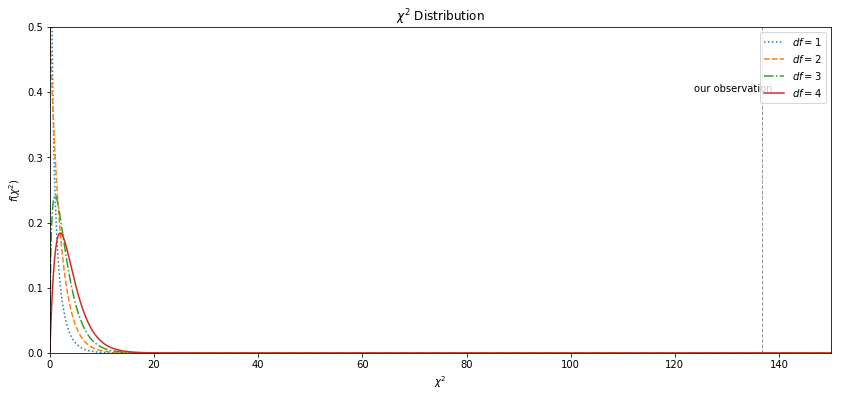

In [157]:
fig, ax = plt.subplots(1, figsize=(14, 6))
linestyles = [':','--','-.','-']
degree_of_freedom = [1, 2, 3, 4]
for df, ls in zip(degree_of_freedom, linestyles):
    ax.plot(X, stats.chi2.pdf(X, df), linestyle=ls, label=r'$df=%i$' % df)

plt.xlim(0, 150)
plt.ylim(0, .5)

plt.xlabel('$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

# Visualize our critical value
plt.vlines(chi_squared_stat, 0, .5, linewidth=1, linestyle='--', alpha=.4)
plt.text(chi_squared_stat-13, .4, 'our observation')

plt.legend()
plt.show()

## Enter the time warp

In [159]:
#data2018 = pd.read_csv('data/2018/survey_results_public.csv')
!ls data

2011
2012
2013
2014
2015
2016
2017
2018


In [180]:
# First we make shure, that the schema looks the same
data2011 = pd.read_csv('data/2011/2011 Stack Overflow Survey Results.csv', encoding = 'ISO-8859-1', delimiter=',')
data2011.columns[:5]

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you work in?'],
      dtype='object')

In [181]:
data2012 = pd.read_csv('data/2012/2012 Stack Overflow Survey Results.csv', encoding = 'ISO-8859-1', delimiter=',')
data2012.columns[:5]

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you currently work in?'],
      dtype='object')

Well, they are not at all the same. Unnamed columns are subcolumns.

### Make a subset of all the years with only the relevant columns 
* C# and Python
* job satisfaction
* age
* annual compensation

#### 2011

In [184]:
data2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,...,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


In [206]:
subset2011 = data2011.iloc[1:, [2, 44, 45, 37, 34]]
subset2011.head(4)

,How old are you?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Unnamed: 37,Unnamed: 34
1,< 20,FML,Student / Unemployed,NaN,NaN
2,25-29,So happy it hurts,NaN,NaN,NaN
3,25-29,NaN,NaN,NaN,NaN
4,< 20,I enjoy going to work,Student / Unemployed,NaN,NaN


In [210]:
subset_columns = ['age', 'job_satisfaction', 'annual_compensation', 'c_sharp', 'python'] 
subset2011.columns = subset_columns

In [215]:
subset2011.head(10)

,age,job_satisfaction,annual_compensation,c_sharp,python
1,< 20,FML,Student / Unemployed,NaN,NaN
2,25-29,So happy it hurts,NaN,NaN,NaN
3,25-29,NaN,NaN,NaN,NaN
4,< 20,I enjoy going to work,Student / Unemployed,NaN,NaN
5,35-39,It pays the bills,"$80,000 - $100,000",NaN,NaN
6,35-39,So happy it hurts,NaN,C#,NaN
7,20-24,It pays the bills,"$20,000 - $40,000",C#,Python
8,20-24,I enjoy going to work,"$80,000 - $100,000",NaN,NaN
9,35-39,I enjoy going to work,"$80,000 - $100,000",C#,NaN
10,NaN,NaN,NaN,NaN,NaN


In [218]:
# We transform languages in boolean columns
subset2011['c_sharp'] = subset2011['c_sharp'].apply(lambda c: c == 'C#')
subset2011['python'] = subset2011['python'].apply(lambda c: c == 'Python')

In [219]:
subset2011.head(10)

,age,job_satisfaction,annual_compensation,c_sharp,python
1,< 20,FML,Student / Unemployed,False,False
2,25-29,So happy it hurts,NaN,False,False
3,25-29,NaN,NaN,False,False
4,< 20,I enjoy going to work,Student / Unemployed,False,False
5,35-39,It pays the bills,"$80,000 - $100,000",False,False
6,35-39,So happy it hurts,NaN,True,False
7,20-24,It pays the bills,"$20,000 - $40,000",True,True
8,20-24,I enjoy going to work,"$80,000 - $100,000",False,False
9,35-39,I enjoy going to work,"$80,000 - $100,000",True,False
10,NaN,NaN,NaN,False,False
